AIM : To highlight horizontal and vertical edges of the given image and to determine histogram of orientation of G.I.

In [ ]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt

In [ ]:
image = data.coins()
[rw,col] = image.shape

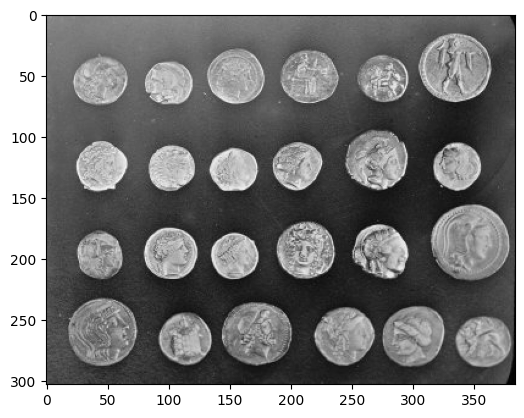

In [ ]:
plt.imshow(image, cmap = 'gray')
# Original Image

Sobel Filter

In [ ]:
gx = cv2.Sobel(image, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = 3)
gy = cv2.Sobel(image, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = 3)

# Here Sobel Filter is detecting change in pixel intensity along x Direction

In [ ]:
gxabs = cv2.convertScaleAbs(gx)
gyabs = cv2.convertScaleAbs(gy)

# Taking Absolute to show representation

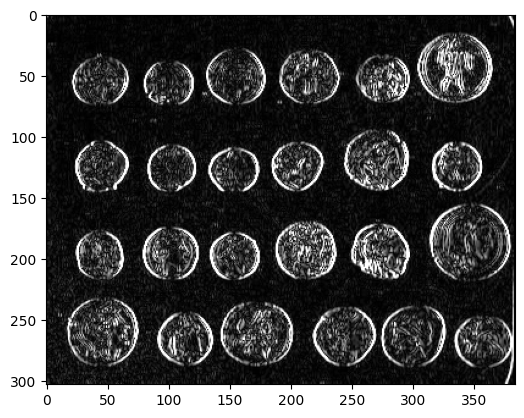

In [ ]:
plt.imshow(gxabs, cmap = 'gray')

# Detecting horizontal gradient to identify vertical edges

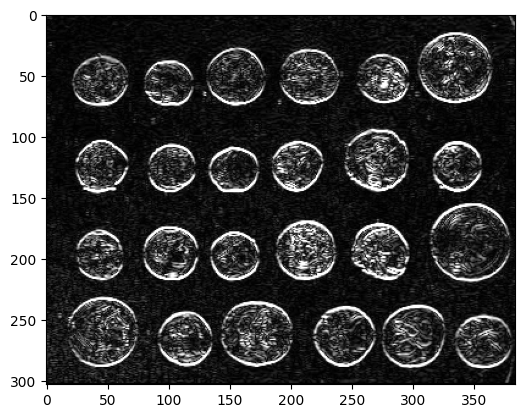

In [ ]:
plt.imshow(gyabs, cmap = 'gray')

# Detecting horizontal gradient to identify vertical edges

# plt.figure(figsize = (10,10)) to increase size of image

In [ ]:
edge_mag = np.sqrt( (gx**2) + (gy**2) )

# Magnitude to take both edges (Vertical AND Horizontal)

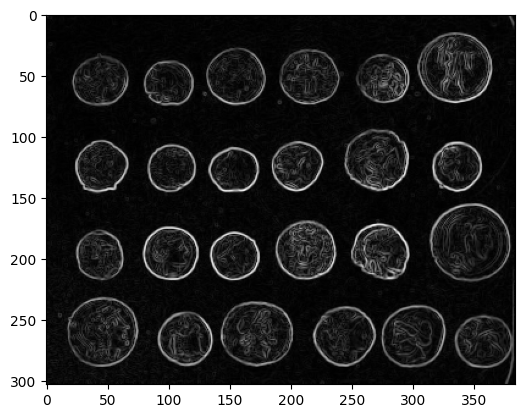

In [ ]:
plt.imshow(edge_mag, cmap='gray')

# If pixel is white, value is 180, if black, then it is 0

In [ ]:
edge_orientat = (np.arctan2(gyabs,gxabs) * 180/np.pi) % 180

#

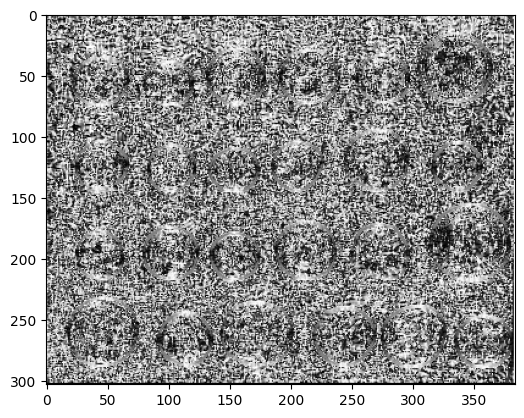

In [ ]:
plt.imshow(edge_orientat, cmap='gray')

# Junk image, basically does not give us any information, which is why we use histogram
# Angles are same

In [ ]:
edge_orientID = np.reshape(edge_orientat, (rw*col, 1))

Text(0, 0.5, 'Frequency')

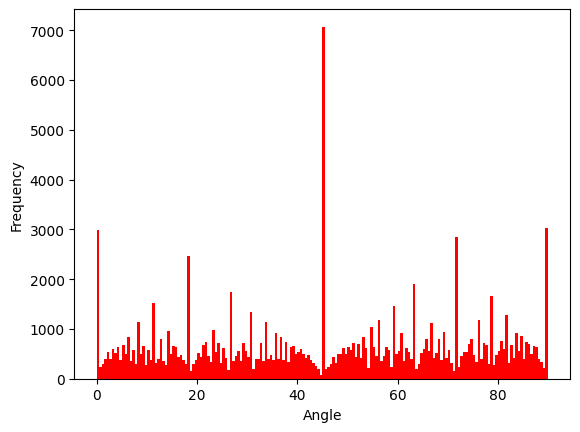

In [ ]:
plt.hist(edge_orientID, bins = 180, color='red')
plt.xlabel('Angle')
plt.ylabel('Frequency')

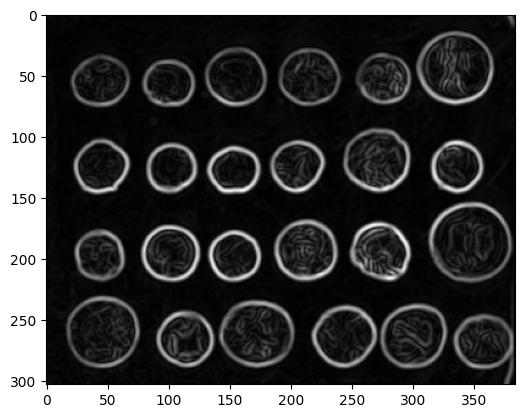

In [ ]:
gx = cv2.Sobel(image, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = 11)
gy = cv2.Sobel(image, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = 11)
edge_mag = np.sqrt( (gx**2) + (gy**2) )
plt.imshow(edge_mag, cmap='gray')

# To see the difference

CONCLUSION:

Sobel filter is used to highlight edges of the given image.

It is observed that, maximum frequency for the edge pixels is at an angle of 45.

If size of Sobel filter is increased from 3 x 3 to 11 x 11, the filter is not able to highlight fine edges of the image. This is because, large filter occupies a larger space of the image. Which may not have a complete edge (broken edge).